In [2]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Approach 1: MTZ Subtour Elimination

/Users/jacob/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


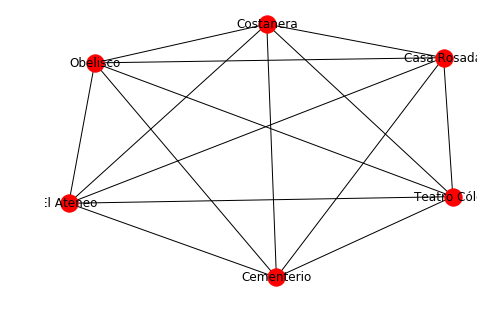

In [5]:
A_walk = np.matrix([[0,21,21,28,27,5],
                    [21,0,42,26,47,16],
                    [21,42,0,40,16,25],
                    [28,26,40,0,48,31],
                    [27,47,16,48,0,32],
                    [5,16,25,31,32,0]])

A_trans = np.matrix([[0,12,14,29,24,5],
                     [12,0,16,25,33,9],
                     [12,17,0,40,17,13],
                     [28,25,40,0,46,35],
                     [25,32,18,46,0,26],
                     [5,10,12,35,23,0]])

np.fill_diagonal(A_walk, 1000)
np.fill_diagonal(A_trans, 1000)

node_to_city = {0: 'Teatro Cólon',
                1: 'Casa Rosada',
                2: 'El Ateneo',
                3: 'Costanera',
                4: 'Cementerio',
                5: 'Obelisco'}

G = nx.from_numpy_matrix(A_walk)
G = nx.relabel_nodes(G, node_to_city)
G = nx.drawing.nx_agraph.to_agraph(G)

nx.draw(G, with_labels = True)
plt.show()

In [6]:
B = cp.Bool(6,6) # boolean matrix, indicating the trip
C = np.matrix('1,1,1,1,1,1') # exemplary matrix
u = cp.Variable(6) # auxiliary var
obj = cp.Minimize(sum([A_trans[i,:]*B[:,i] for i in range(6)])) # objective


constraints = [(cp.sum_entries(B, axis=0) == C), 
               (cp.sum_entries(B, axis=1) == C.transpose())]

constraints.append(u >= 0)

for i in range(1,6):
    for j in range(1,6):
        if i != j:
            constraints.append(u[i] - u[j] + 6 * B[i,j] <= 5)

            
prob = cp.Problem(obj, constraints)
opt = prob.solve()

Minimum time: 116.00000000004682
Optimal Path: ['Teatro Cólon', 'El Ateneo', 'Cementerio', 'Costanera', 'Casa Rosada', 'Obelisco']


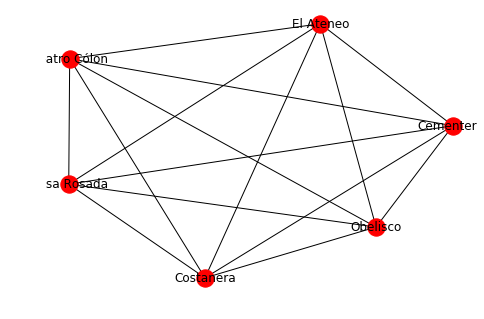

In [7]:
def subtour(B):
    node = 0
    subt = [node]
    while True:
        for j in range(6):
            #print (B[subt[-1], j])
            if B[subt[-1],j] > 0.99:
                if j not in subt:
                    subt.append(j)
                else:
                    return subt
                
# Print results
print("Minimum time:", opt)
print("Optimal Path:", [node_to_city[i] for i in subtour(B.value)])

nx.draw(G, with_labels = True)
plt.show()